<a href="https://colab.research.google.com/github/abhinav-exp/Forecasting-CryptoCurrency-Prices/blob/master/ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataBTC2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)

In [3]:
data1.head()

,CBBTCUSD
DATE,
2017-06-18,2515.25
2017-06-19,2596.98
2017-06-20,2725.08
2017-06-21,2643.35
2017-06-22,2679.99


<Axes: xlabel='DATE'>

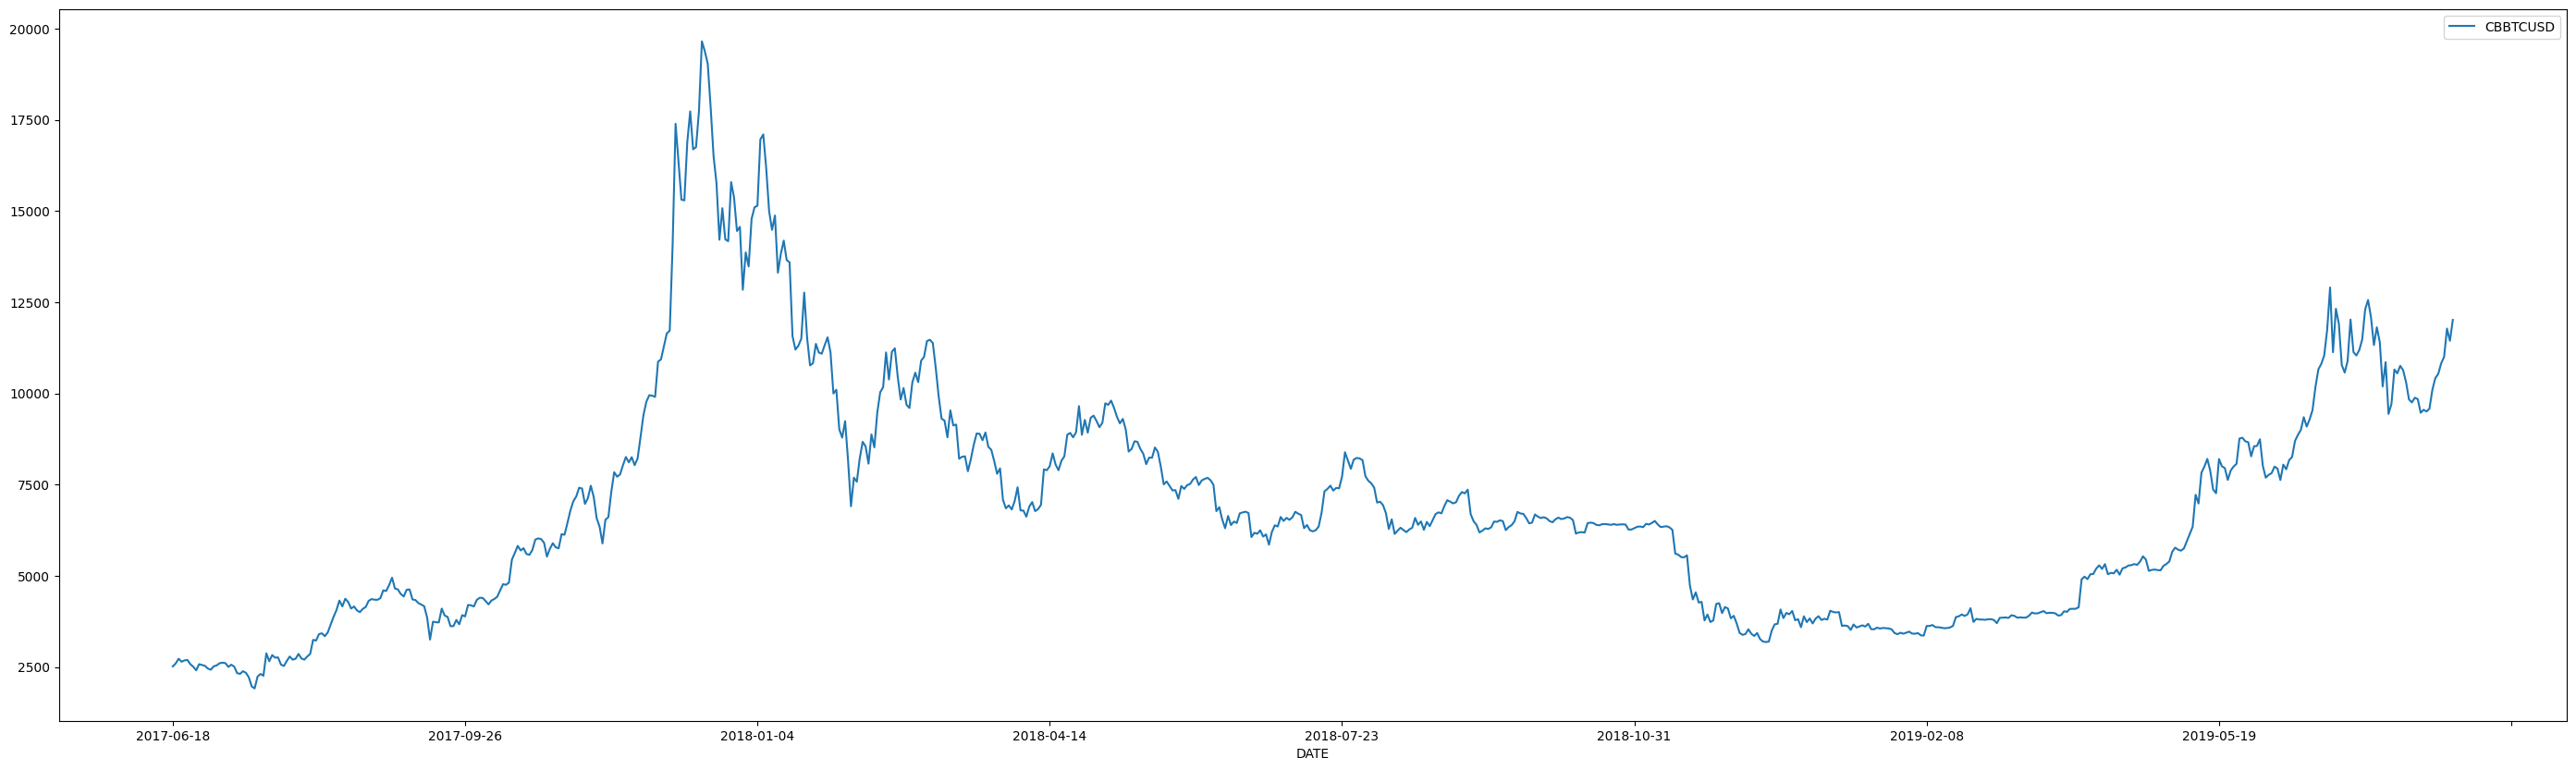

In [4]:
data1.plot(figsize=(35, 10))

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


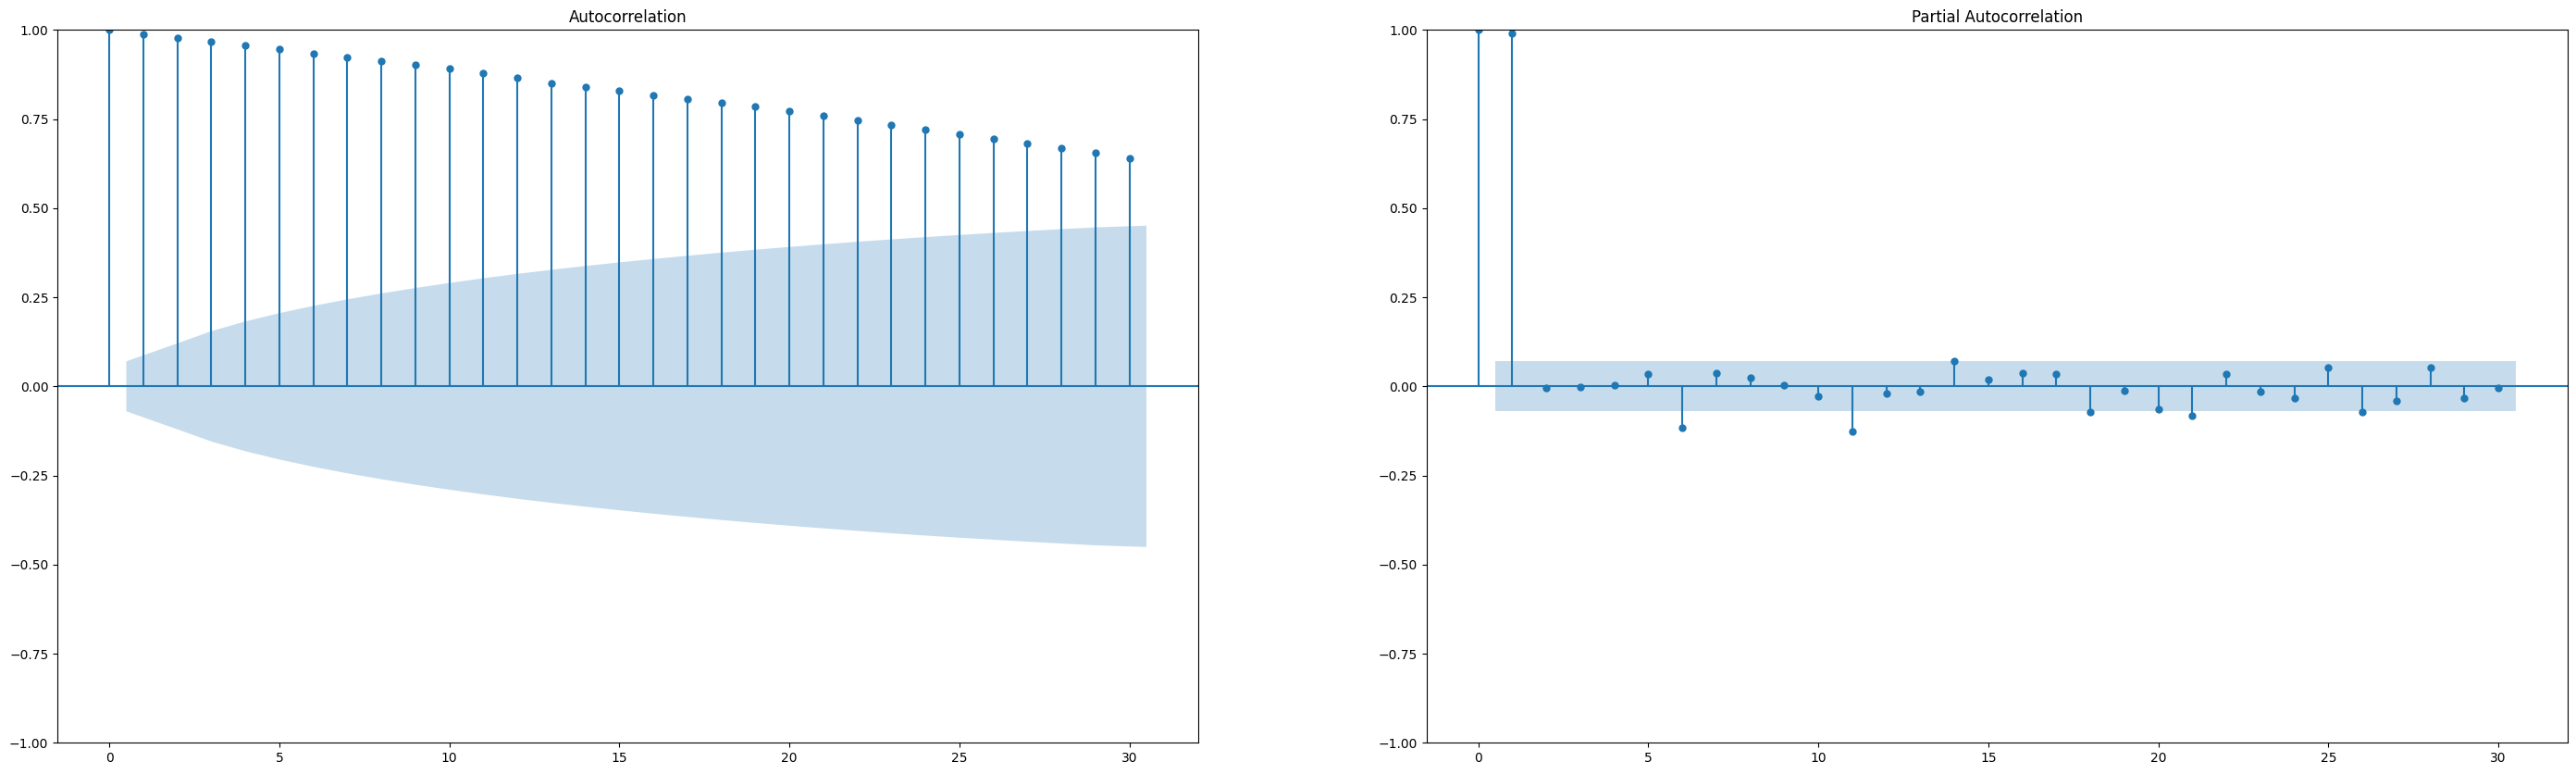

In [5]:
pyplot.figure(figsize = (35, 10))
pyplot.subplot(121)
plot_acf(data1, ax=pyplot.gca(),lags=30)
pyplot.subplot(122)
plot_pacf(data1, ax=pyplot.gca(),lags=30)
pyplot.show()

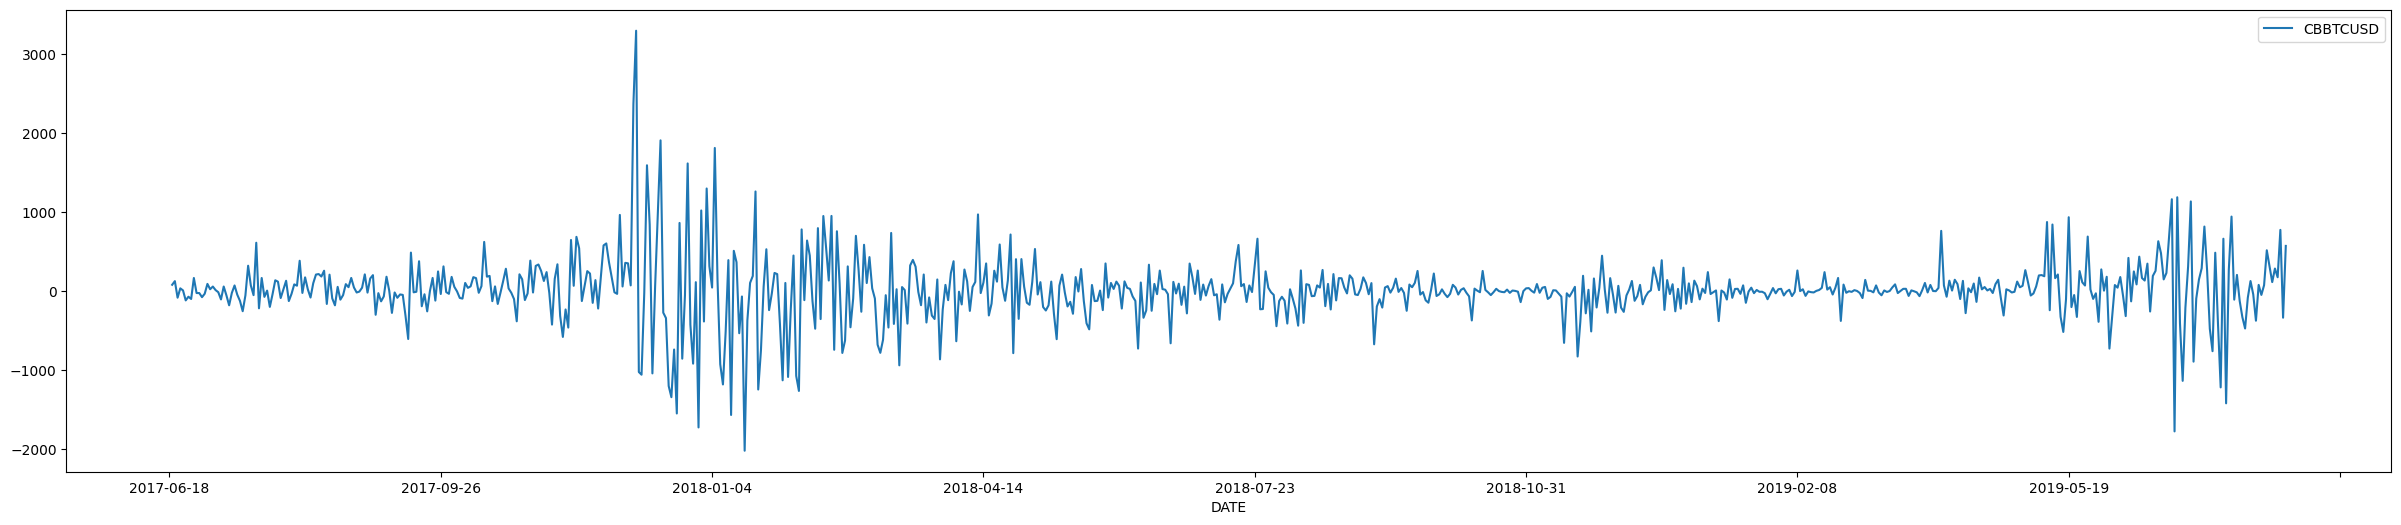

In [6]:
returns = data1.diff()
returns.plot(figsize = (30, 6))
pyplot.show()

In [7]:
training_data = data1[:int(0.85*len(data1))]
testing_data = data1[int(0.85*len(data1)):]
print(data1.shape)
print(training_data.shape)
print(testing_data.shape)

(781, 1)
(663, 1)
(118, 1)


In [8]:
model = ARIMA(training_data, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               CBBTCUSD   No. Observations:                  663
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4914.083
Date:                Mon, 03 Apr 2023   AIC                           9836.166
Time:                        19:45:03   BIC                           9854.153
Sample:                    06-18-2017   HQIC                          9843.137
                         - 04-11-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6584.0643   1890.568      3.483      0.000    2878.619    1.03e+04
ar.L1          0.9911      0.003    295.126      0.000       0.985       0.998
ma.L1          0.0760      0.018      4.135      0.0

In [9]:
forecast = model_fit.forecast(len(testing_data))
forecast = pd.DataFrame(forecast, index = testing_data.index)
print(forecast)

            predicted_mean
DATE                      
2019-04-12     5032.316215
2019-04-13     5046.072825
2019-04-14     5059.707480
2019-04-15     5073.221260
2019-04-16     5086.615238
...                    ...
2019-08-03     6016.758207
2019-08-04     6021.787509
2019-08-05     6026.772224
2019-08-06     6031.712749
2019-08-07     6036.609475

[118 rows x 1 columns]


<Figure size 640x480 with 0 Axes>

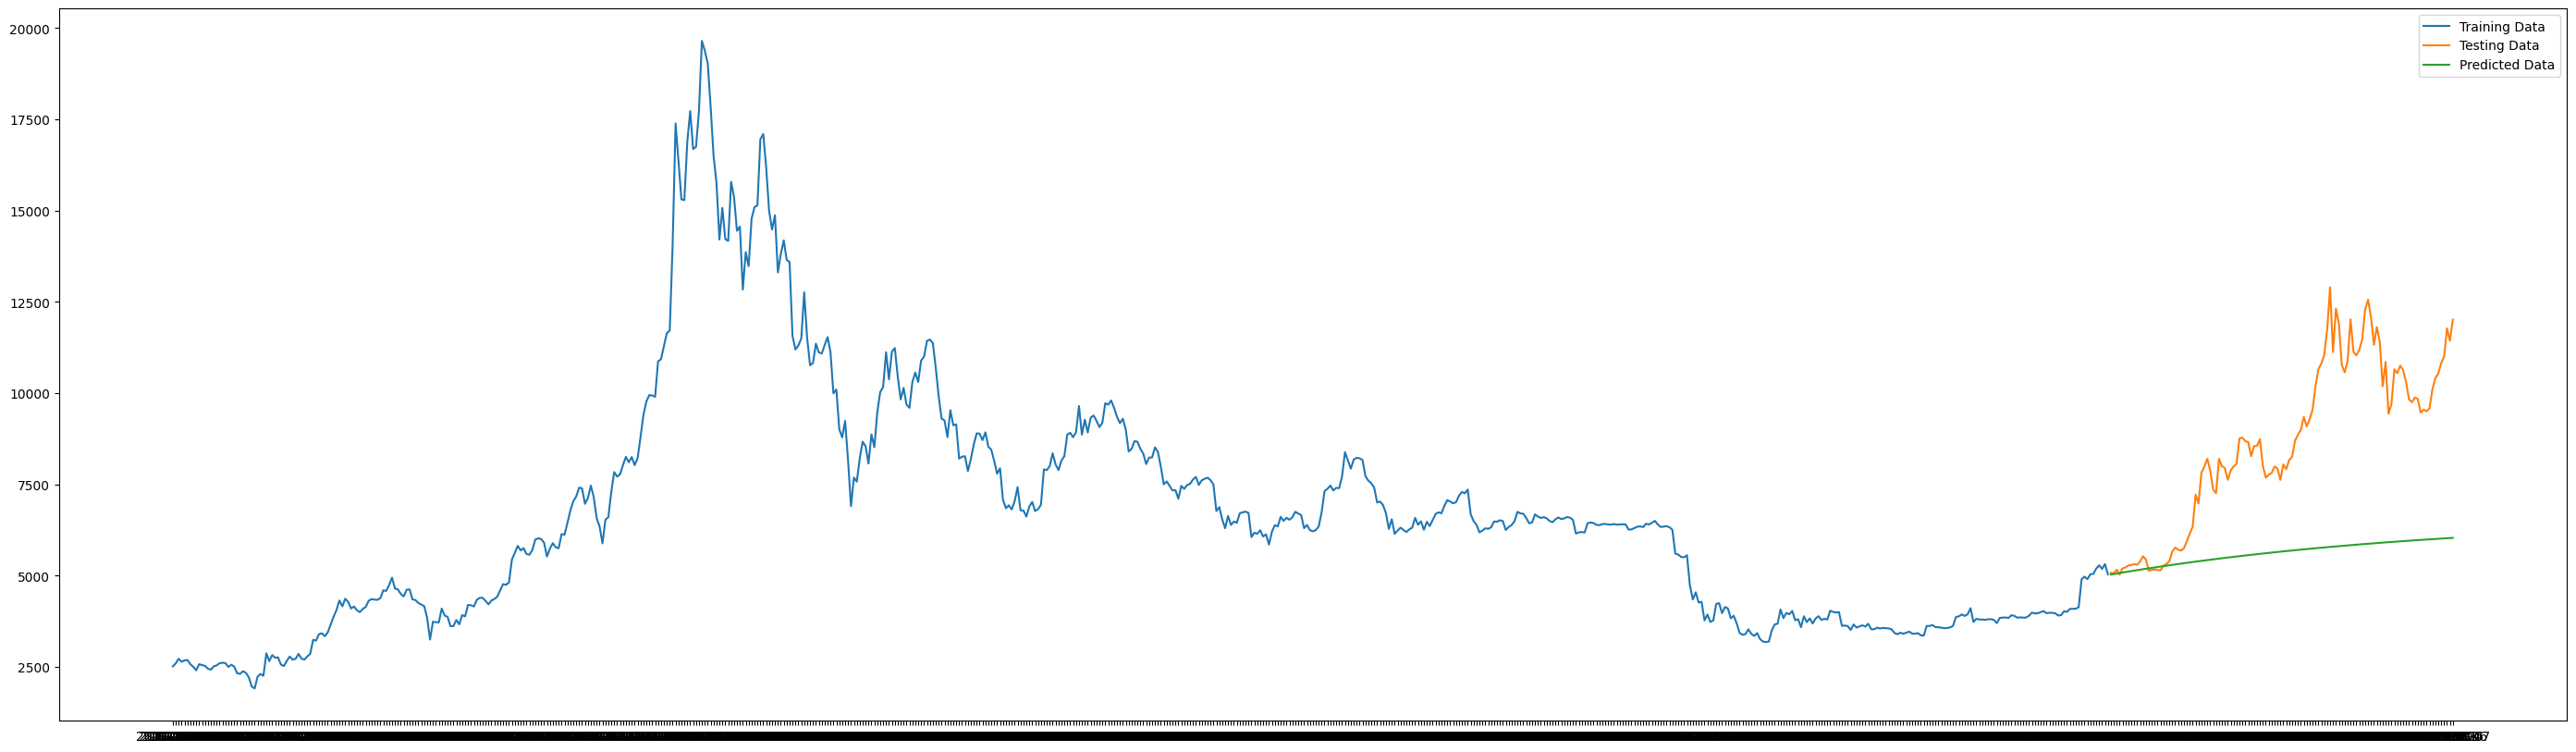

In [11]:
pyplot.figure()
pyplot.figure(figsize=(35, 10))
pyplot.plot(training_data, label='Train')
pyplot.plot(testing_data, label='Valid')
pyplot.plot(forecast, label='Prediction')
pyplot.legend(["Training Data", "Testing Data", "Predicted Data"])
pyplot.show()

In [14]:
rms1 = sqrt(mean_squared_error(testing_data ,forecast))
print('RMSE',rms1)
print('MAE', mean_absolute_error(testing_data, forecast))
print('MAPE', mean_absolute_percentage_error(testing_data ,forecast))

RMSE 3593.8400632079843
MAE 2992.9717132082974
MAPE 0.30484000586209764
